## Old question, LR = 0.1

##Task 1
Question 1

In [ ]:
import torch
import numpy as np

# Set seed for reproducibility
np.random.seed(45)

# Generate dataset
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert numpy arrays to torch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32, requires_grad=False)
y_tensor = torch.tensor(y, dtype=torch.float32, requires_grad=False)

# t0=int(input("Enter value of theta0: "))
# t1=int(input("Enter value of theta1: "))

t0 =0
t1 =0
# Initialize parameters (theta0 and theta1)
theta0 = torch.tensor(t0, dtype=torch.float32, requires_grad=True)
theta1 = torch.tensor(t1, dtype=torch.float32, requires_grad=True)

# Define the linear model
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0

# Define the loss function (Mean Squared Error)
def compute_loss(predictions, targets):
    return torch.mean((predictions - targets) ** 2)

# Perform forward pass
predictions = linear_model(x1_tensor, theta0, theta1)
loss = compute_loss(predictions, y_tensor)

# Compute gradients
loss.backward()

# Print gradients
print("Gradient of loss w.r.t theta0:", theta0.grad.item())
print("Gradient of loss w.r.t theta1:", theta1.grad.item())


Gradient of loss w.r.t theta0: -7.447054386138916
Gradient of loss w.r.t theta1: -1.0253016948699951


Question 2


In [ ]:

# Initialize lists to store gradients
gradients_theta_0 = []
gradients_theta_1 = []

# Calculate stochastic gradients for each data point
for i in range(num_samples):
    # Extract the i-th data point
    x1_i = x1_tensor[i]
    y_i = y_tensor[i]

    # Create tensors for θ0 and θ1 with requires_grad=True for each point
    theta_0 = torch.tensor(t0, dtype=torch.float32, requires_grad=True)
    theta_1 = torch.tensor(t1, dtype=torch.float32, requires_grad=True)

    # Compute the prediction
    y_pred_i = theta_1 * x1_i + theta_0

    # Compute the loss for this data point (MSE)
    loss_i = (y_pred_i - y_i) ** 2

    # Compute gradients
    loss_i.backward()

    # Store gradients
    gradients_theta_0.append(theta_0.grad.item())
    gradients_theta_1.append(theta_1.grad.item())

# Compute average gradients
avg_gradient_theta_0 = np.mean(gradients_theta_0)
avg_gradient_theta_1 = np.mean(gradients_theta_1)

# Print the results
print(f"Average Stochastic Gradient w.r.t. θ0: {avg_gradient_theta_0}")
print(f"Average Stochastic Gradient w.r.t. θ1: {avg_gradient_theta_1}")

# The true gradient should be printed from the previous step
print(f"True Gradient w.r.t. θ0: ", theta0.grad.item())
print(f"True Gradient w.r.t. θ1: ", theta1.grad.item())


Average Stochastic Gradient w.r.t. θ0: -7.4470539569854735
Average Stochastic Gradient w.r.t. θ1: -1.0253017988055944
True Gradient w.r.t. θ0:  -7.447054386138916
True Gradient w.r.t. θ1:  -1.0253016948699951


Question 3

Optimal loss: 0.5957542061805725
Average Full-batch GD converged in 65.00 iterations and 65.00 epochs
Average Mini-batch GD converged in 2016.80 iterations and 504.20 epochs
Average SGD converged in 19784.00 iterations and 494.60 epochs


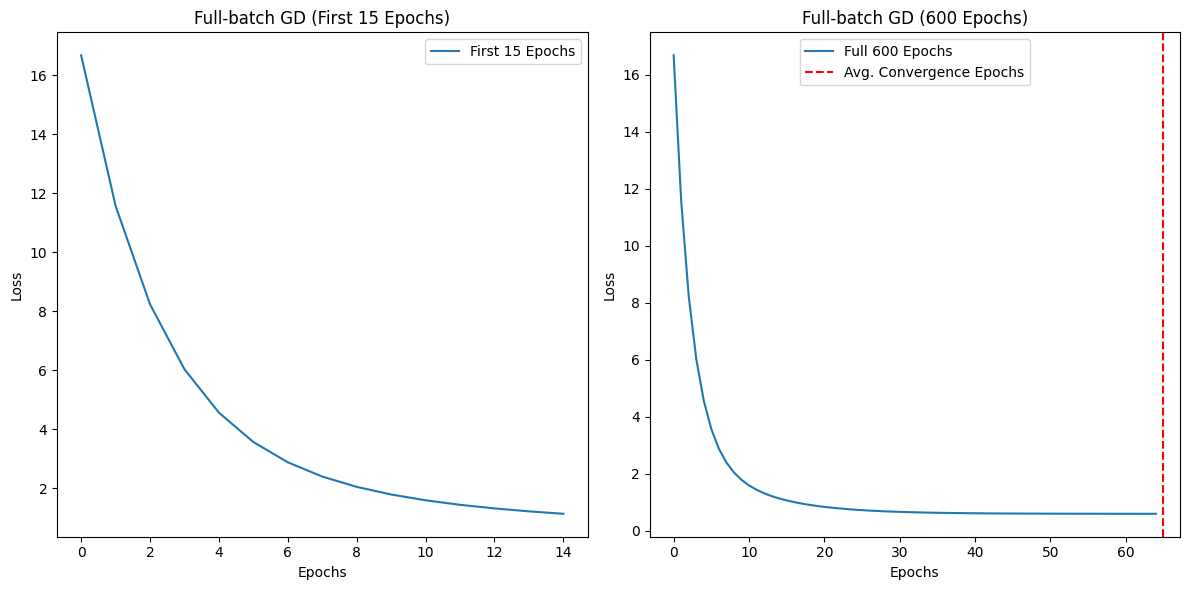

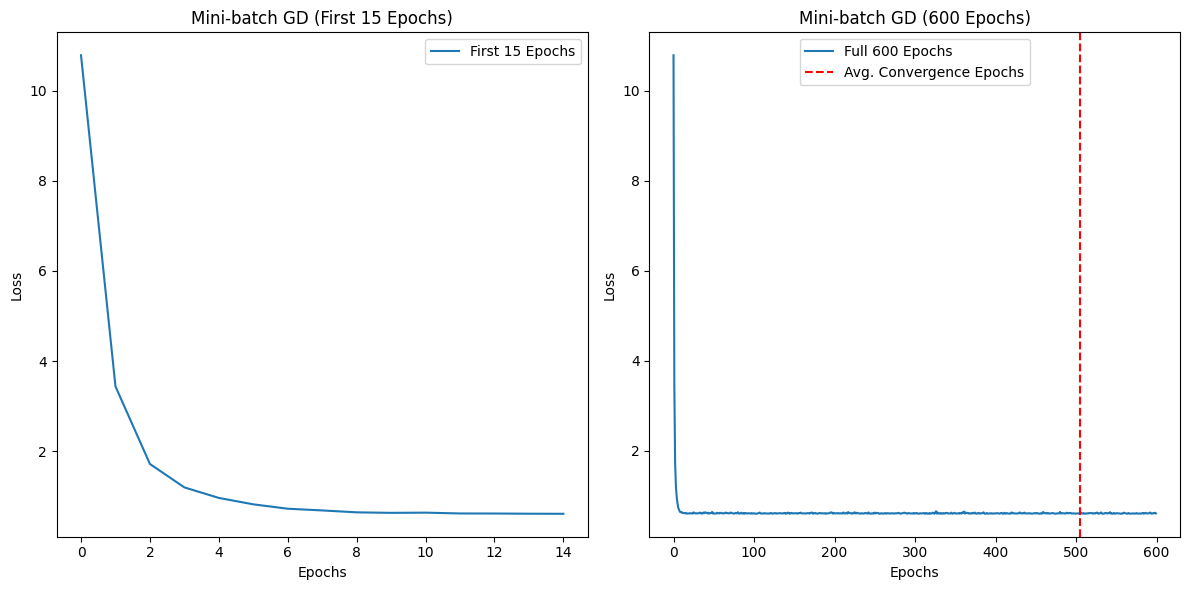

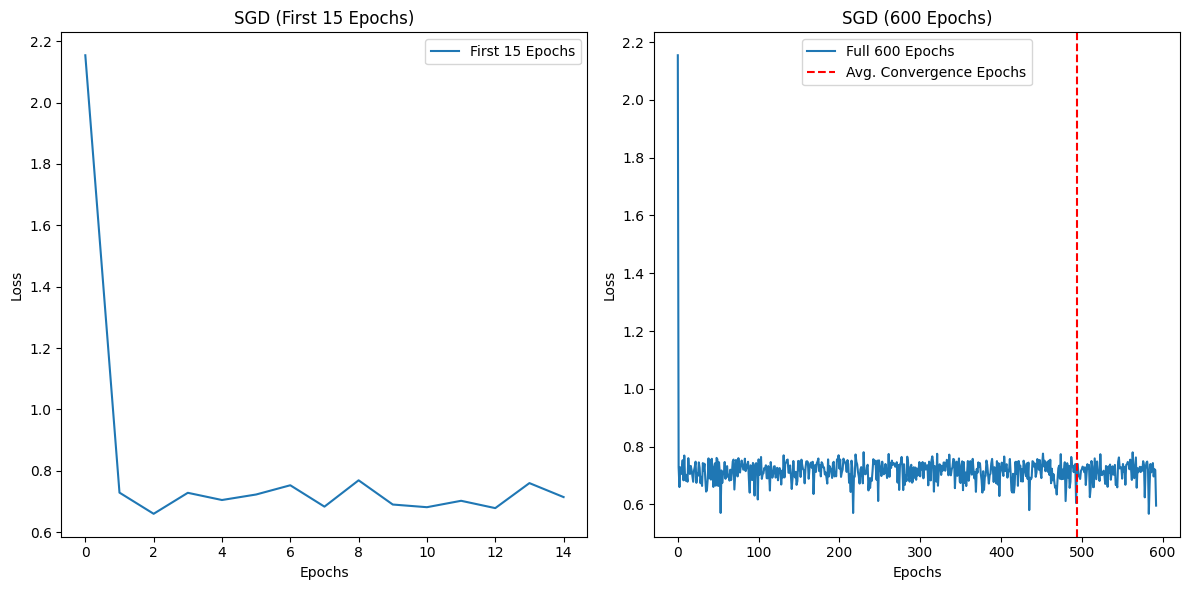

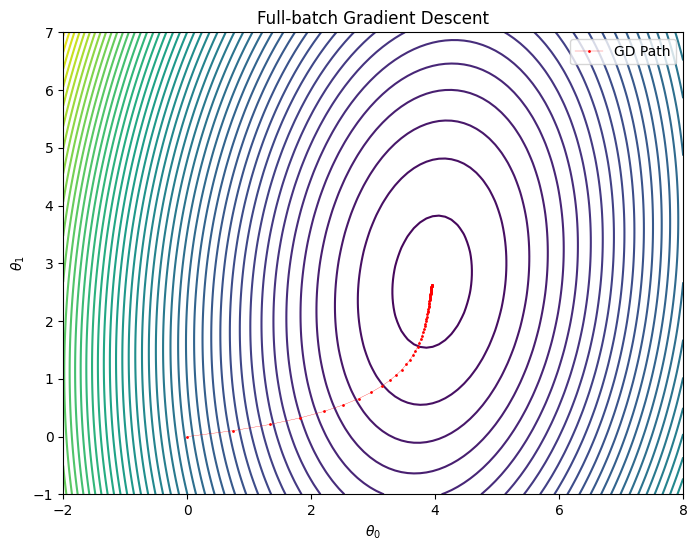

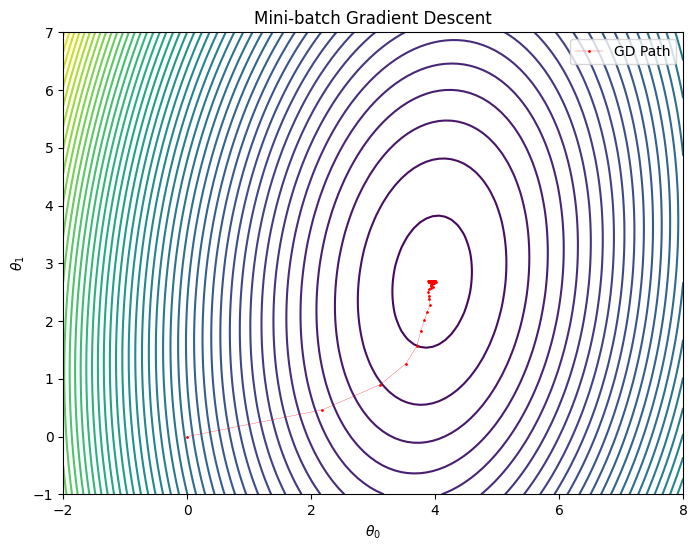

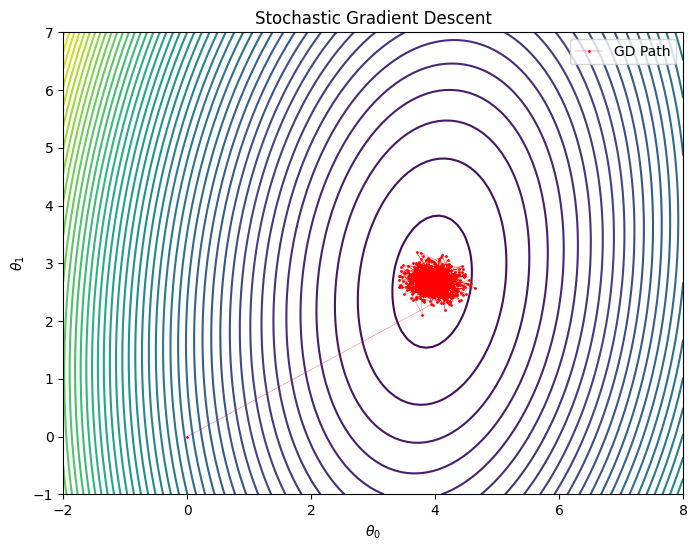

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Gradient Descent Update Step (with out-of-place operations)
def update_params(theta0, theta1, grads, lr):
    theta0.data = theta0 - lr * grads[0]  # out-of-place operation
    theta1.data = theta1 - lr * grads[1]  # out-of-place operation
    return theta0, theta1

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 600 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full 600 Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (600 Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Helper function to calculate the optimal loss (based on the closed-form solution or an approximation)
def calculate_optimal_loss(x, y):
    optimal_theta1 = (torch.mean(x * y) - torch.mean(x) * torch.mean(y)) / (torch.mean(x ** 2) - torch.mean(x) ** 2)
    optimal_theta0 = torch.mean(y) - optimal_theta1 * torch.mean(x)
    preds = linear_model(x, optimal_theta0, optimal_theta1)
    optimal_loss = compute_loss(preds, y)
    return optimal_loss.item()

# Full-batch Gradient Descent
def full_batch_gd(x, y, theta0, theta1, lr=0.1, epochs=600, epsilon=0.001, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        loss.backward()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1 = update_params(theta0, theta1, grads, lr)
        theta0.grad.zero_()
        theta1.grad.zero_()

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        iterations += 1
        if abs(loss.item() - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1 , theta0_path, theta1_path

# Mini-batch Gradient Descent
def mini_batch_gd(x, y, theta0, theta1, lr=0.1, epochs=600, batch_size=10, epsilon=0.001, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)sd

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()

            # theta0_path.append(theta0.item())
            # theta1_path.append(theta1.item())

            iterations += 1

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())
        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)
        if abs(avg_loss - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1 , theta0_path, theta1_path

# Stochastic Gradient Descent (SGD)
def sgd(x, y, theta0, theta1, lr=0.1, epochs=600, epsilon=0.001, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1 = update_params(theta0, theta1, grads, lr)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())



        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)
        if abs(avg_loss - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-2, 8, 100)
    theta1_vals = np.linspace(-1, 7, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=1,linewidth=0.2, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

# Compute the optimal loss
optimal_loss = calculate_optimal_loss(x1_tensor, y_tensor)
print(f"Optimal loss: {optimal_loss}")

# Run each method multiple times to calculate average iterations and epochs to convergence
num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []

for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 600 epochs)
plot_loss(full_losses, "Full-batch GD", avg_full_batch_epochs, 600, 'full_batch_gd.png')
plot_loss(mini_losses, "Mini-batch GD", avg_mini_batch_epochs, 600, 'mini_batch_gd.png')
plot_loss(sgd_losses, "SGD", avg_sgd_epochs, 600, 'sgd.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")

Explanation:


1.   In decreasing order of number of epochs to converge : SGD > MBD >FBD
2.   In the contour plots, we see that the initial steps (1 step == 1 epoch) taken by schotastic gradients are bigger and accurate, but later they become more noisy which causes the process to be better converging at the beginning but later its steps become noisy leading to the large number of epochs required for reaching the optimal range. It will wander around the optimal solution but will not be able to reach the optimal solution due to its focus on 1 datapoint rather than the whole dataset.
3.   Mini-Batch method is like an intermediate between the full-batch and schotastic as it also makes batches from the whole datase and thus needs larger number of epochs to reach the optimal range than the full-batch method. It still does better than Schotastic method as its batch size is larger than 1. The larger the batch size, the more it behaves like the full-batch method and less like schotastic.



Question 4

Optimal loss: 0.5957542061805725
With Momentum : Average Full-batch GD converged in 36.00 iterations and 36.00 epochs
With Momentum : Average Mini-batch GD converged in 1475.20 iterations and 368.80 epochs
With Momentum : Average SGD converged in 24000.00 iterations and 600.00 epochs


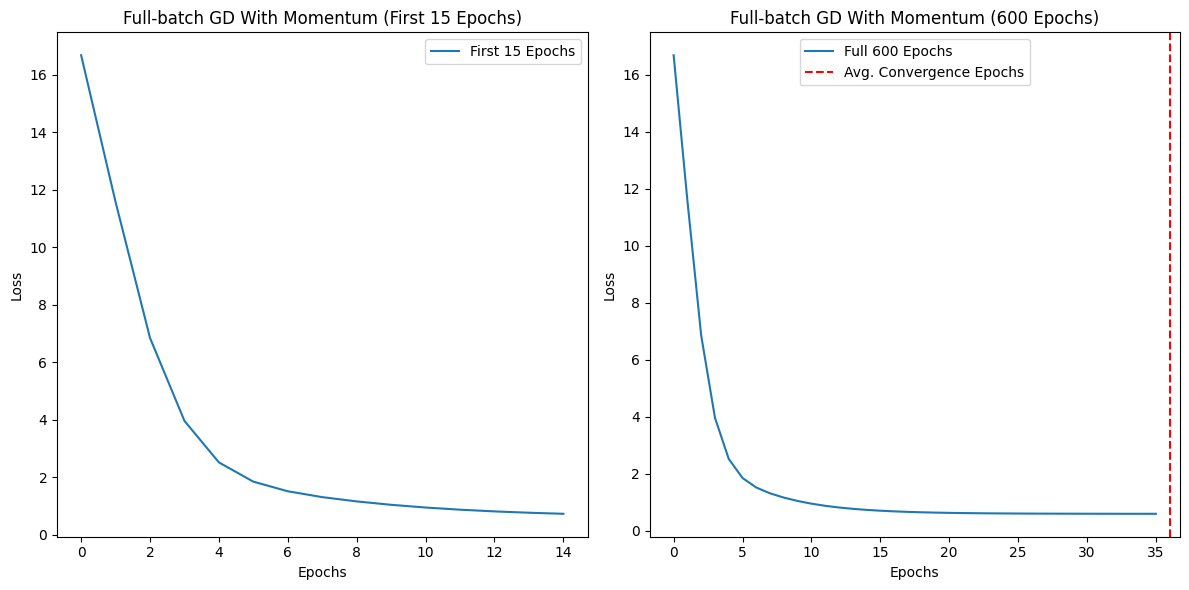

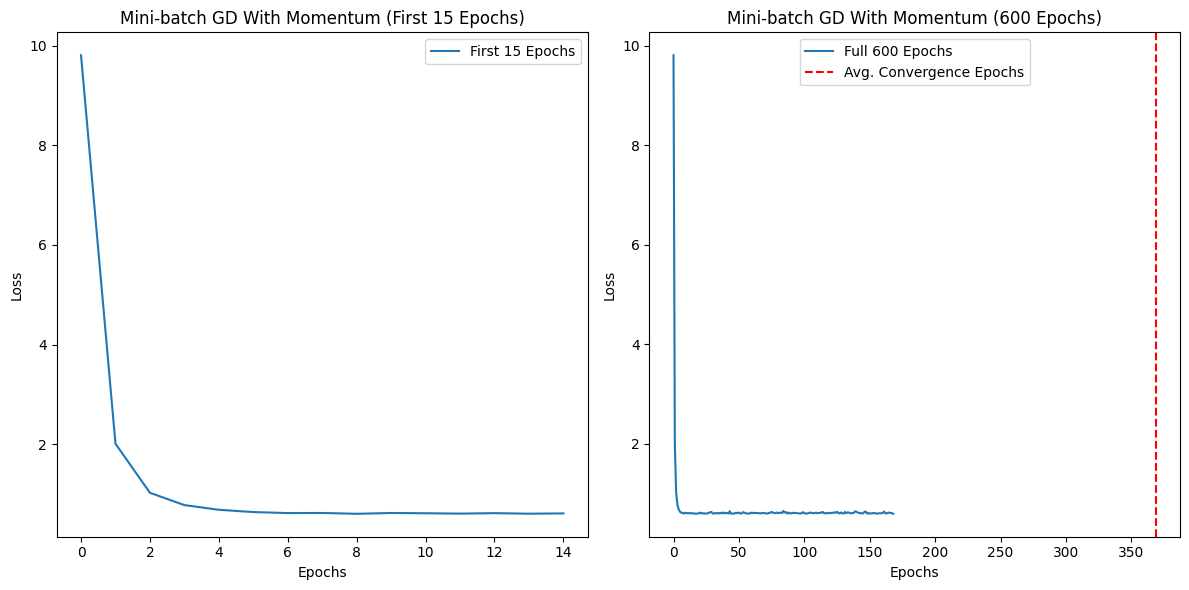

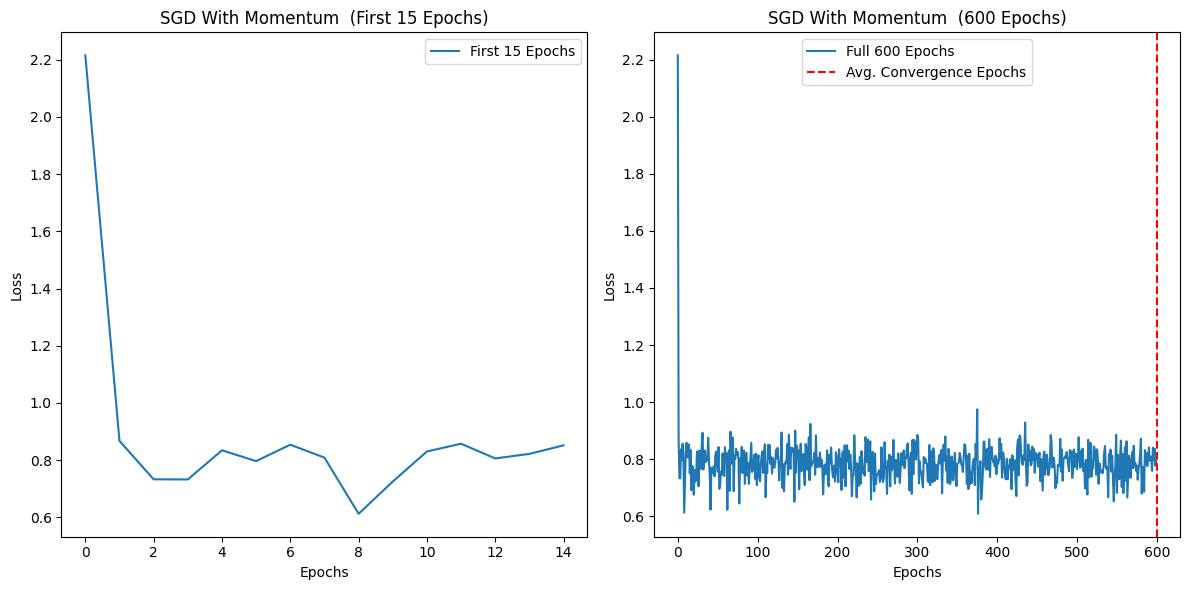

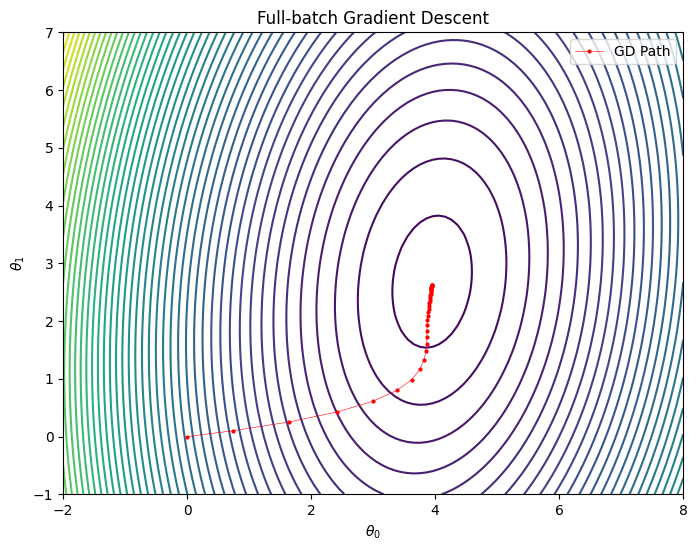

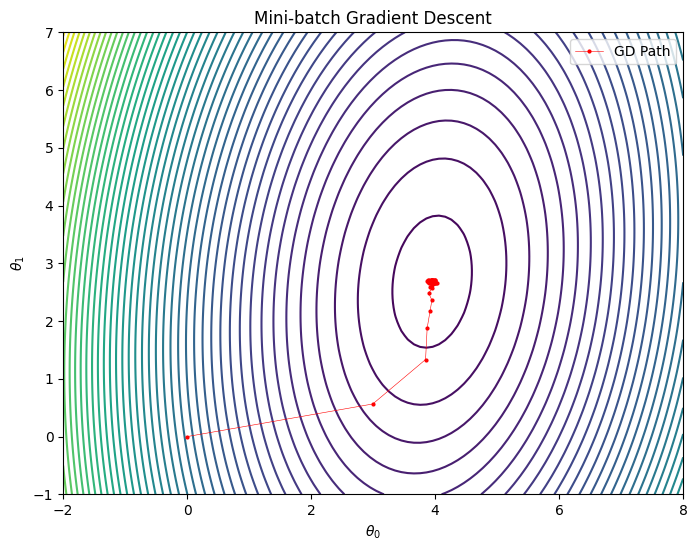

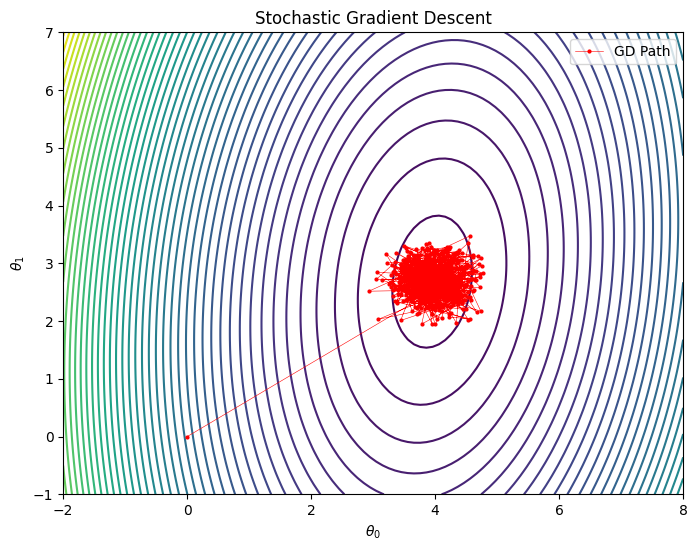

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Gradient Descent Update Step (with momentum)
def update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x):
    change_x = lr * grads[0] + momentum * prev_change_x[0]
    theta0.data -= change_x  # out-of-place operation

    change_y = lr * grads[1] + momentum * prev_change_x[1]
    theta1.data -= change_y  # out-of-place operation

    return theta0, theta1, (change_x, change_y)

# Plotting loss over epochs for each method
def plot_loss(losses, title, avg_epochs, max_epochs, filename):
    plt.figure(figsize=(12, 6))

    # Loss for the first 15 epochs
    plt.subplot(1, 2, 1)
    plt.plot(losses[:15], label='First 15 Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (First 15 Epochs)')
    plt.legend()

    # Loss for the full 600 epochs
    plt.subplot(1, 2, 2)
    plt.plot(losses, label='Full 600 Epochs')
    plt.axvline(x=avg_epochs, color='r', linestyle='--', label='Avg. Convergence Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} (600 Epochs)')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Helper function to calculate the optimal loss (based on the closed-form solution or an approximation)
def calculate_optimal_loss(x, y):
    optimal_theta1 = (torch.mean(x * y) - torch.mean(x) * torch.mean(y)) / (torch.mean(x ** 2) - torch.mean(x) ** 2)
    optimal_theta0 = torch.mean(y) - optimal_theta1 * torch.mean(x)
    preds = linear_model(x, optimal_theta0, optimal_theta1)
    optimal_loss = compute_loss(preds, y)
    return optimal_loss.item()

# Full-batch Gradient Descent with Momentum
def full_batch_gd_momentum(x, y, theta0, theta1, lr=0.1, epochs=600, epsilon=0.001, momentum=0.4, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    for epoch in range(epochs):
        preds = linear_model(x, theta0, theta1)
        loss = compute_loss(preds, y)
        losses.append(loss.item())

        loss.backward()
        grads = [theta0.grad, theta1.grad]
        theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
        theta0.grad.zero_()
        theta1.grad.zero_()

        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())

        iterations += 1
        if abs(loss.item() - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Mini-batch Gradient Descent with Momentum
def mini_batch_gd_momentum(x, y, theta0, theta1, lr=0.1, epochs=600, batch_size=10, epsilon=0.001, momentum=0.4, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_x, batch_y in loader:
            preds = linear_model(batch_x, theta0, theta1)
            loss = compute_loss(preds, batch_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1
        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())



        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)
        if abs(avg_loss - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Stochastic Gradient Descent with Momentum
def sgd_momentum(x, y, theta0, theta1, lr=0.1, epochs=600, epsilon=0.001, momentum=0.4, optimal_loss=None):
    losses = []
    iterations = 0
    theta0_path, theta1_path = [theta0.item()], [theta1.item()]
    prev_change_x = (0.0, 0.0)
    dataset = torch.utils.data.TensorDataset(x, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0
        for point_x, point_y in loader:
            preds = linear_model(point_x, theta0, theta1)
            loss = compute_loss(preds, point_y)
            epoch_loss += loss.item()

            loss.backward()
            grads = [theta0.grad, theta1.grad]
            theta0, theta1, prev_change_x = update_params_momentum(theta0, theta1, grads, lr, momentum, prev_change_x)
            theta0.grad.zero_()
            theta1.grad.zero_()
            iterations += 1
        theta0_path.append(theta0.item())
        theta1_path.append(theta1.item())



        avg_loss = epoch_loss / len(loader)
        losses.append(avg_loss)
        if abs(avg_loss - optimal_loss) < epsilon:
            break
    return theta0, theta1, losses, iterations, epoch + 1, theta0_path, theta1_path

# Function to create contour plot
def plot_contour(x, y, theta0_path, theta1_path, title):
    # Define theta0 and theta1 grid
    theta0_vals = np.linspace(-2, 8, 100)
    theta1_vals = np.linspace(-1, 7, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute loss for each combination of theta0 and theta1
    loss_grid = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            preds = theta1_grid[i, j] * x + theta0_grid[i, j]
            loss_grid[i, j] = np.mean((y - preds) ** 2)

    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contour(theta0_grid, theta1_grid, loss_grid, levels=50, cmap='viridis')
    plt.plot(theta0_path, theta1_path, marker='o', markersize=2, linewidth=0.4, color='red', label='GD Path')
    plt.title(title)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    plt.legend()
    plt.show()

# Initialization and parameters
theta0_init = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)
theta1_init = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

# Compute the optimal loss
optimal_loss = calculate_optimal_loss(x1_tensor, y_tensor)
print(f"Optimal loss: {optimal_loss}")

# Run each method multiple times to calculate average iterations and epochs to convergence
num_runs = 10
full_batch_iterations = []
mini_batch_iterations = []
sgd_iterations_list = []
full_batch_epochs = []
mini_batch_epochs = []
sgd_epochs_list = []


for _ in range(num_runs):
    theta0_full, theta1_full, full_losses, full_iterations, full_epochs,full_theta0_path, full_theta1_path = full_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )
    theta0_mini, theta1_mini, mini_losses, mini_iterations, mini_epochs , mini_theta0_path, mini_theta1_path= mini_batch_gd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )
    theta0_sgd, theta1_sgd, sgd_losses, sgd_iterations, sgd_epochs , sgd_theta0_path, sgd_theta1_path = sgd_momentum(
        x1_tensor, y_tensor, theta0_init.clone().detach().requires_grad_(True),
        theta1_init.clone().detach().requires_grad_(True), optimal_loss=optimal_loss
    )

    full_batch_iterations.append(full_iterations)
    mini_batch_iterations.append(mini_iterations)
    sgd_iterations_list.append(sgd_iterations)

    full_batch_epochs.append(full_epochs)
    mini_batch_epochs.append(mini_epochs)
    sgd_epochs_list.append(sgd_epochs)

# Calculate average number of iterations and epochs
avg_full_batch_iterations = np.mean(full_batch_iterations)
avg_mini_batch_iterations = np.mean(mini_batch_iterations)
avg_sgd_iterations = np.mean(sgd_iterations_list)

avg_full_batch_epochs = np.mean(full_batch_epochs)
avg_mini_batch_epochs = np.mean(mini_batch_epochs)
avg_sgd_epochs = np.mean(sgd_epochs_list)

# Print the average number of iterations and epochs for each method
print(f"With Momentum : Average Full-batch GD converged in {avg_full_batch_iterations:.2f} iterations and {avg_full_batch_epochs:.2f} epochs")
print(f"With Momentum : Average Mini-batch GD converged in {avg_mini_batch_iterations:.2f} iterations and {avg_mini_batch_epochs:.2f} epochs")
print(f"With Momentum : Average SGD converged in {avg_sgd_iterations:.2f} iterations and {avg_sgd_epochs:.2f} epochs")

# Plotting the losses for comparison (visualizing for 15 and 600 epochs)
plot_loss(full_losses, "Full-batch GD With Momentum", avg_full_batch_epochs, 600, 'full_batch_gd_m.png')
plot_loss(mini_losses, "Mini-batch GD With Momentum", avg_mini_batch_epochs, 600, 'mini_batch_gd_m.png')
plot_loss(sgd_losses, "SGD With Momentum ", avg_sgd_epochs, 600, 'sgd_m.png')

# Plot the contour plots for each method
plot_contour(x1, y, full_theta0_path, full_theta1_path, "Full-batch Gradient Descent")
plot_contour(x1, y, mini_theta0_path, mini_theta1_path, "Mini-batch Gradient Descent")
plot_contour(x1, y, sgd_theta0_path, sgd_theta1_path, "Stochastic Gradient Descent")


Explanation:



1.   The momentum we chose: 0.4
2.   After using the momentum method, the average number of epochs required for full-batch gradient method decreased from nearly 65 to 35. This means that momentum helped us positively. Using the momentum increased our step size in the right direction. But when we see the average number of epochs required for schotastic approach, it has increased greatly. The result 600 epochs means that it didn't converge in any of the 10 trials. The epochs stopped when it reached the value of 600. This means that using momentum with schotastic gradient is not a good approach as it increases the step size but in the wrong or noisy direction leading to even larger differences between our solutions and optimal solution.
3.   The larger we set the momemtum, the more noisier optimization process gets for schotastic gradient.

